В этом дз необходимо обучить модели для классификации. Cегодня попробуем отличать настоящие новости от фейковых



In [1]:
# ячейка импортов

import numpy as np
import pandas as pd

# импорт моделей
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report # табличка с метриками

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings("ignore")
# %matplotlib inline 


In [3]:
from google.colab import files
uploaded = files.upload()

Saving news_fake-n-true.csv.zip to news_fake-n-true.csv.zip


# Exploratory Data Analysis (EDA)



In [7]:
! unzip "news_fake-n-true.csv.zip"


Archive:  news_fake-n-true.csv.zip
replace news_fake-n-true.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: news_fake-n-true.csv    
replace __MACOSX/._news_fake-n-true.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._news_fake-n-true.csv  


In [8]:
data = pd.read_csv("news_fake-n-true.csv")
data.head(4)

,Unnamed: 0,title,text,subject,date,label
0,0,ADVISORY: Story on Kushner visiting Iraq withd...,(Reuters) - The story “Trump son-in-law Jared ...,politicsNews,"April 3, 2017",1
1,1,Kasich campaign denies report of Romney endors...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"March 14, 2016",1
2,2,WATCH: Colbert Devises Perfect Advertisement ...,If America is going to end the day Donald Trum...,News,"May 20, 2016",0
3,3,Trump says hopes for Cuban 'freedom' after Cas...,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",politicsNews,"November 26, 2016",1


**колонка label отвечает за тип новости: настоящие имеют лейбл 1,  фейковые новости -- с лейблом 0** 

In [9]:
# создадим новый датафрейм из старого

data = data.drop(['Unnamed: 0','title','subject','date'], axis=1)

display(data)

,text,label
0,(Reuters) - The story “Trump son-in-law Jared ...,1
1,WASHINGTON (Reuters) - Republican presidential...,1
2,If America is going to end the day Donald Trum...,0
3,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",1
4,"Well, it seems that despite the efforts of not...",0
...,...,...
44893,Donald Trump s economic proposals would be dis...,0
44894,INDIANAPOLIS (Reuters) - President Donald Trum...,1
44895,During a private meeting of the most senior Re...,0
44896,"AMMAN (Reuters) - Sabih al-Masri, Jordan s mos...",1


распределение настоящих и фейковых новостей примерно равное

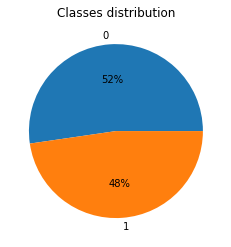

In [10]:
classes =pd.value_counts(data["label"])

classes.plot(kind = 'pie',  autopct='%0.f%%') 
plt.title("Classes distribution")
plt.ylabel('')

plt.show()

**давайте попробуем предсказать:** окажется ли текст настоящей новостью или фейковой

- Векторизуйте тексты
- Разделите данные на обучающую и тестовую выборку

Попробуйте обучить разные модели для классификации на данных
1. Naive Bayes
2. SVM 
3. Decision Trees
4. Random Forest
5. Boosting

Для каждой модели посмотрите на метрики с помощью функции [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Какая/какие модель/ли справляются с задачей наиболее эффективно?

In [11]:
# заберем все слова по условию, заджойним в строку, разобьем по пробелам, возьмем топ-20
count1 = Counter(" ".join(data[data['label']==1]["text"]).lower().split()).most_common(20) 
df1 = pd.DataFrame.from_dict(count1) # новый дф
df1 = df1.rename(columns={0: "words in non-fake", 1 : "count"})

# тот же набор операций для второго подкорпуса
count2 = Counter(" ".join(data[data['label']==0]["text"]).lower().split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in fake", 1 : "count"})

display(df1,df2)

,words in non-fake,count
0,the,477832
1,to,244369
2,of,204654
3,a,196601
4,and,180796
5,in,179501
6,on,107739
7,that,84922
8,for,79112
9,said,72035


,words in fake,count
0,the,525528
1,to,288565
2,of,235161
3,and,222329
4,a,209598
5,in,162846
6,that,144901
7,s,128331
8,is,107720
9,for,91066


In [12]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')

In [13]:
data["text"]

0        (Reuters) - The story “Trump son-in-law Jared ...
1        WASHINGTON (Reuters) - Republican presidential...
2        If America is going to end the day Donald Trum...
3        WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...
4        Well, it seems that despite the efforts of not...
                               ...                        
44893    Donald Trump s economic proposals would be dis...
44894    INDIANAPOLIS (Reuters) - President Donald Trum...
44895    During a private meeting of the most senior Re...
44896    AMMAN (Reuters) - Sabih al-Masri, Jordan s mos...
44897    BEIRUT (Reuters) - Lebanese President Michel A...
Name: text, Length: 44898, dtype: object

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = f.fit_transform(data["text"])
# print(f.get_feature_names()) # посмотрим на признаки



In [53]:
data

,text,label
0,(Reuters) - The story “Trump son-in-law Jared ...,1
1,WASHINGTON (Reuters) - Republican presidential...,1
2,If America is going to end the day Donald Trum...,0
3,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",1
4,"Well, it seems that despite the efforts of not...",0
...,...,...
44893,Donald Trump s economic proposals would be dis...,0
44894,INDIANAPOLIS (Reuters) - President Donald Trum...,1
44895,During a private meeting of the most senior Re...,0
44896,"AMMAN (Reuters) - Sabih al-Masri, Jordan s mos...",1


In [54]:
display(X)

<44898x121690 sparse matrix of type '<class 'numpy.int64'>'
	with 6881046 stored elements in Compressed Sparse Row format>

In [55]:
# новые переменные
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['label'], 
                                                                    test_size=0.2, random_state=50)

# print(X_train.shape, X_test.shape)
sum(y_test == 1)

4262

In [56]:
# для проверки
display(X_train.shape)
# для проверки (какие уникальные значения есть)
display(y_train.unique())

(35918, 121690)

array([1, 0])

MultinomialNB

In [57]:
list_alpha = np.arange(1/100000, 20, 0.11) 
#возьмем лист равномерно распределенных значений от 1/100000 до 20(можно выбрать другие числа,эти были выбраны экспериментально)

score_train = np.zeros(len(list_alpha)) # задали пустые списки по длине изначального листа
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0

In [58]:
for alpha in list_alpha: # для каждого значения в списке альф
    bayes = naive_bayes.MultinomialNB(alpha=alpha) # используем модель
    bayes.fit(X_train, y_train) # тренируем модель
    
    score_train[count] = bayes.score(X_train, y_train) # итерируемся по индексу в листе, добавляем значения accuracy
    
    score_test[count]= bayes.score(X_test, y_test)
    
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))  #какие из новостей действительно фейк
    
    count = count + 1 # после одной итерации, делаем новый шаг

In [59]:
# насколько хорошо модель справляется с данными.
score_train

array([0.97853444, 0.96441895, 0.96280417, 0.96185756, 0.96102233,
       0.96018709, 0.95957459, 0.95910129, 0.95882287, 0.95854446,
       0.95812684, 0.95770923, 0.95745866, 0.95729161, 0.9571524 ,
       0.95698536, 0.95684615, 0.95665126, 0.95656774, 0.95651206,
       0.95642853, 0.95623364, 0.95598307, 0.95581603, 0.9555933 ,
       0.95545409, 0.9552592 , 0.95512   , 0.95500863, 0.95484158,
       0.95475806, 0.95467454, 0.9546467 , 0.95456317, 0.95436828,
       0.9543126 , 0.95422908, 0.95414555, 0.95406203, 0.95389498,
       0.95381146, 0.95372794, 0.95367225, 0.95367225, 0.95361657,
       0.95364441, 0.95356089, 0.95353305, 0.95350521, 0.95347737,
       0.953366  , 0.95333816, 0.95333816, 0.95319895, 0.95308759,
       0.95303191, 0.95297622, 0.95292054, 0.95286486, 0.95278134,
       0.95272565, 0.95269781, 0.95261429, 0.95258645, 0.95266997,
       0.95266997, 0.95264213, 0.95264213, 0.95264213, 0.95258645,
       0.95250292, 0.95250292, 0.95250292, 0.95244724, 0.95244

In [60]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])


display(models.head(10))

display(matrix.shape)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.978534,0.960690,0.947677,0.968817
1,0.11001,0.964419,0.958018,0.953778,0.957597
2,0.22001,0.962804,0.957906,0.954012,0.957156
3,0.33001,0.961858,0.957461,0.953778,0.956471
4,0.44001,0.961022,0.956793,0.953778,0.955122
5,0.55001,0.960187,0.956347,0.953543,0.954439
6,0.66001,0.959575,0.955679,0.953074,0.953521
7,0.77001,0.959101,0.955345,0.953074,0.952850
8,0.88001,0.958823,0.955011,0.953308,0.951968
9,0.99001,0.958544,0.954120,0.952604,0.950820


(182, 5)

In [61]:
#модель с наивысшей test_precision
best_index = models['Test Precision'].idxmax()
best_index

# display(best_index)

display(models.iloc[best_index])

alpha             0.000010
Train Accuracy    0.978534
Test Accuracy     0.960690
Test Recall       0.947677
Test Precision    0.968817
Name: 0, dtype: float64

In [62]:
models[models['Test Recall']>0.9].sort_values(by="Test Precision", ascending = False)
# проверить модели с высокими знаечниями recall и precision.

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.978534,0.960690,0.947677,0.968817
1,0.11001,0.964419,0.958018,0.953778,0.957597
2,0.22001,0.962804,0.957906,0.954012,0.957156
3,0.33001,0.961858,0.957461,0.953778,0.956471
4,0.44001,0.961022,0.956793,0.953778,0.955122
...,...,...,...,...,...
59,6.49001,0.952781,0.949666,0.949085,0.945093
63,6.93001,0.952586,0.949555,0.948850,0.945081
62,6.82001,0.952614,0.949555,0.948850,0.945081
45,4.95001,0.953644,0.950111,0.950258,0.944937


In [64]:
best_index = models[models['Test Precision']>0.95]['Test Accuracy'].idxmax()

models.iloc[best_index]

alpha             0.000010
Train Accuracy    0.978534
Test Accuracy     0.960690
Test Recall       0.947677
Test Precision    0.968817
Name: 0, dtype: float64

In [65]:
bayes = naive_bayes.MultinomialNB(alpha= 0.000010) # используем лучшую модель
bayes.fit(X_train, y_train) # тренируем алгоритм на данных

bayes.predict(X_test) # метод для предсказания

# сделаем датафрейм с колонками для настоящего класса и для предсказанного

new_df = pd.DataFrame(data = y_test)
new_df["predicted"]=bayes.predict(X_test) # добавляем новую колонку с предсказаниями

new_df

,label,predicted
18322,0,0
6805,0,0
11776,0,0
43603,1,1
1166,1,1
...,...,...
3814,0,0
27520,1,1
11071,0,1
2479,0,0


In [66]:
# classification_report
report = classification_report(y_test, bayes.predict(X_test), target_names=['Non-fake', 'Fake'])
print(report)

              precision    recall  f1-score   support

    Non-fake       0.95      0.97      0.96      4718
        Fake       0.97      0.95      0.96      4262

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



SVM

In [ ]:
list_C = np.arange(500, 2000, 100) #100000

score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1

In [ ]:
#10 Первых моделей и их метрики

matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

In [ ]:
#выберем модель с лучшим test precision
best_index = models['Test Precision'].idxmax()

display(models.iloc[best_index, :])

In [ ]:
# посмотрим на модели с почти 100% Precision

models[models['Test Precision']>0.95].head(5)

In [ ]:
best_index = models[models['Test Precision']>0.99]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

In [67]:
import numpy as np
import pandas as pd
# from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [68]:
display(data)

,text,label
0,(Reuters) - The story “Trump son-in-law Jared ...,1
1,WASHINGTON (Reuters) - Republican presidential...,1
2,If America is going to end the day Donald Trum...,0
3,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",1
4,"Well, it seems that despite the efforts of not...",0
...,...,...
44893,Donald Trump s economic proposals would be dis...,0
44894,INDIANAPOLIS (Reuters) - President Donald Trum...,1
44895,During a private meeting of the most senior Re...,0
44896,"AMMAN (Reuters) - Sabih al-Masri, Jordan s mos...",1


In [69]:
# векторизация
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")

X = vectorizer.fit_transform(data['text'])

In [70]:
# разделение на обучающую и тестовую выборку

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, data["label"], test_size=0.3, random_state=25)

Decision Tree

In [71]:
# сначала обучим одно решающее дерево
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [72]:
tree_clf = DecisionTreeClassifier()

In [73]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
tree_y_pred = tree_clf.predict(X_test)

In [75]:
tree_y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [76]:
print(classification_report(y_test, tree_y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7094
           1       1.00      0.99      0.99      6376

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



Random forest


In [77]:
from sklearn.ensemble import RandomForestClassifier 
#forest = RandomForestClassifier(n_estimators=500, verbose=1)
# forest = RandomForestClassifier(n_estimators=3, max_depth=5, verbose=5) #так было в лекции
forest = RandomForestClassifier(n_estimators=200, max_depth=50, verbose=5) #так было в лекции

используемые параметры модели: 
- n_estimators : число деревьев в ансамбле (лесе)
- max_depth : глубина дерева 
- verbose : пояснения о процессе обучения 



In [78]:
#обучим
forest.fit(X_train, y_train)

building tree 1 of 200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 200


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 200


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


building tree 4 of 200


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s


building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 2

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.7min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=5, warm_start=False)

In [79]:
forest_y_pred = forest.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.7s finished


In [80]:
print(classification_report(y_test, forest_y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7094
           1       0.99      0.99      0.99      6376

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Boosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gb_clf = GradientBoostingClassifier(n_estimators=200, random_state=10, verbose=1) #на 100 итераций уже хорошо работает
# loss - количество ошибок (должно уменьшаться)

используемые параметры [модели](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier):
- loss : The loss function to be optimized. ‘deviance’ refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm.
- n_estimators : The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
- random_state : Controls the random seed given to each Tree estimator at each boosting iteration. In addition, it controls the random permutation of the features at each split (see Notes for more details). It also controls the random spliting of the training data to obtain a validation set if n_iter_no_change is not None. Pass an int for reproducible output across multiple function calls. See Glossary.
- verbose : Enable verbose output. If 1 then it prints progress and performance once in a while (the more trees the lower the frequency). If greater than 1 then it prints progress and performance for every tree.


In [83]:
gb_clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1983           10.25m
         2           1.0459           10.16m
         3           0.9190           10.07m
         4           0.8118            9.96m
         5           0.7203            9.90m
         6           0.6414            9.84m
         7           0.5731            9.78m
         8           0.5137            9.73m
         9           0.4616            9.69m
        10           0.4159            9.63m
        20           0.1658            9.10m
        30           0.0833            8.60m
        40           0.0541            8.08m
        50           0.0399            7.55m
        60           0.0355            7.03m
        70           0.0274            6.51m
        80           0.0247            6.00m
        90           0.0234            5.50m
       100           0.0220            4.99m
       200           0.0157            0.00s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [84]:
gb_y_pred = gb_clf.predict(X_test)

In [85]:
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7094
           1       0.99      1.00      0.99      6376

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



Итоги: из 4-х моделей наихудшиие результаты показал Naive Bayes, однако сами результаты довольно неплохие: самое низкое значение - precision и recall у нефейковых новостей (0,95), при это f1 и accuracy - 0,96.
Наилучшие результаты показал Boosting. Почти все значения равны единице, включая accuracy и f1. Значит модель правильно находит то, что нужно и не находит ненужное.